## Goal
Create a simple LED cube visualization based on 3D scatterplots which can be used to create visualization tests until hardware is available

In [62]:
using Plots
using Colors

In [217]:
plotlyjs();

In [19]:
mutable struct Cube
    vels
    pitches
    size
end

In [18]:
mutable struct Note
    pitch
    velocity
    left_right
end

In [231]:
"""
Adds a note into a cube for visualization
"""
function add_note!(c::Cube, n::Note)
    left_right = Int(round(n.left_right*5/127)) + 1 
    octave = clamp((n.pitch ÷ 12) - 1, 1, 6)
    # for now, just make a stack on the depth axis
    for j=1:c.size
        if c.vals[left_right, j, octave] == 0
            c.vals[left_right, j, octave] = n.velocity
            break
        end
    end
end

add_note!

In [232]:
rand_midi() = abs(rand(Int))%127

rand_midi (generic function with 1 method)

In [233]:
s = 6 
c = Cube(zeros(s, s, s), s)

Cube([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], 6)

In [234]:
ns = [Note(rand_midi(), rand_midi(), rand_midi()) for i=1:10]

10-element Array{Note,1}:
 Note(117, 55, 54)
 Note(57, 114, 58)
 Note(40, 70, 53) 
 Note(12, 47, 66) 
 Note(12, 101, 54)
 Note(113, 73, 94)
 Note(57, 126, 66)
 Note(22, 95, 110)
 Note(96, 10, 16) 
 Note(118, 5, 120)

In [235]:
[add_note!(c, n) for n in ns]

10-element Array{Nothing,1}:
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing

In [242]:
function plot_cube(c::Cube, cmap)
    cgrid = [(x, y, z) for x=0:c.size, y=0:c.size, z=0:c.size];
    cgrid = collect(zip(cgrid...));
    cgrid = [collect(x) for x in cgrid];
    colors = reshape(cmap.(c.vals), (length(c.vals), 1))
    return scatter3d(plgrid..., markercolor=colors, legend=nothing,
        xlabel="left_right",
        ylabel="note stack"
        zlabel="octave",
    )
end

LoadError: syntax: missing comma or ) in argument list

In [243]:
function val_to_hue(val)
    return HSV(Int(round(val*360/127)), 0.8, 0.8)
end

val_to_hue (generic function with 1 method)

In [244]:
plot_cube(c, val_to_hue)

<!DOCTYPE html>
 
 
 Plots.jl

# Scratch

In [205]:
cols = [HSV(i, 0.8, 0.8) for i=range(0,step=1,length=360)];
cols = reshape(cols, (10, 36))

In [206]:
using Random

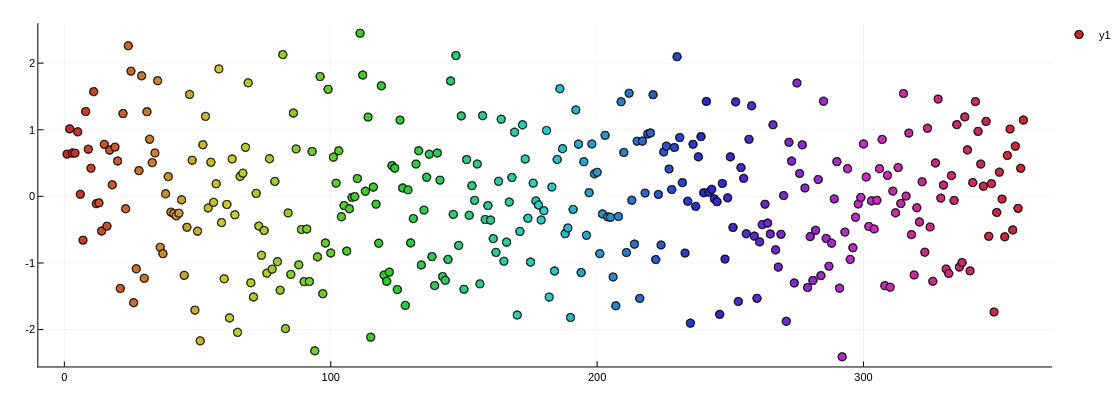

In [207]:
scatter(1:360, randn((360)), markercolor=reshape(cols, (length(cols), 1)))